In [7]:
import bz2
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE

from utils import read_file

- "subreddit":"reddit.com",
- "score":3,
- "ups":3,
- "author_flair_css_class":null,
- "created_utc":1167609605,
- "body":"In the city I live in, I probably am.  Might even be the entire island.  Ah well.  It\'s one thing to know that somewhere, out there over the Internet, there are many like me.  It\'s another thing to know someone, in my everyday life off the internet, who is like me too.\\r\\n\\r\\nPixels on a screen just aren\'t enough.\\r\\n\\r\\nLife is a sadness.  But what else can we do but live it?  Life is a happiness.  But what else can we do but endure it?\\r\\n",
- "controversiality":0,
- "subreddit_id":"t5_6",
- "link_id":"t3_wiw8",
- "stickied":false,
- "gilded":0,
- "distinguished":null,
- "retrieved_on":1473809765,
- "author":"almkglor",
- "author_flair_text":null,
- "id":"cwl3r",
- "edited":false,
- "parent_id":"t1_cwjuc"

link_id is submission id
parent_id is t1_id for child comment, t3_id for top level comment

In [8]:
meta1 = pd.read_csv('/sciclone/geograd/stmorse/reddit/metadata/metadata_2007-01.csv', compression='gzip')
meta2 = pd.read_csv('/sciclone/geograd/stmorse/reddit/metadata/metadata_2007-02.csv', compression='gzip')
meta2.head()

,id,created_utc,parent_id,subreddit,subreddit_id,author,idx
0,c128oj,1170288047,t1_c124gv,programming,t5_2fwo,dons,0
1,c128ok,1170288055,t3_127fd,reddit.com,t5_6,indigoshift,1
2,c128ot,1170288082,t1_c128nr,reddit.com,t5_6,rutabaga,2
3,c128ov,1170288082,t1_c127e3,reddit.com,t5_6,dotrob,3
4,c128p3,1170288120,t3_121yo,programming,t5_2fwo,justinhj,4


In [10]:
meta1.query('id == "c128nr"')

,id,created_utc,parent_id,subreddit,subreddit_id,author,idx
58946,c128nr,1170287830,t3_127g7,reddit.com,t5_6,rutabaga,58946


In [13]:
with open('/sciclone/geograd/stmorse/reddit/links/graph.json', 'r') as f:
    z = json.load(f)

In [16]:
z['edge_index'][0][:5], z['edge_index'][1][:5], z['edge_weight'][:5]

([270, 2765, 2698, 2698, 1378],
 [2333, 3614, 2765, 3614, 2333],
 [1, 1, 1, 1, 1])

In [21]:
z2 = np.array(z['edge_weight'])
np.where(z2 > 10)

(array([  177,   212,   516,   637,   745,   775,   780,   947,  1004,
         1989,  2048,  2249,  2968,  2977,  3056,  3264,  3592,  4289,
         4608,  4743,  4799,  4877,  4902,  4965,  5021,  5025,  5638,
         5675,  6276,  6335,  6371,  6391,  7020,  7031,  8837,  9069,
         9081,  9082,  9670,  9677, 10657, 10847, 11264, 11385, 11991,
        12085, 12166, 12724, 13243, 13293, 13417, 13511, 13520, 13618,
        14299, 14616, 14690, 15297, 15417, 16004, 16387, 16416, 16435,
        16467, 17190, 17273, 18789, 18982, 19128, 19252, 19384, 20104,
        20160, 21472, 21566, 22185, 22443, 22543]),)

In [4]:
df = pd.read_csv('/sciclone/geograd/stmorse/reddit/subreddit/science/users/user_label_counts_2008.csv')
df.head()

,author,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-J-,0,0,1,0,1,1,4,0,0,5,2,2,1,0,0
1,02J,3,0,4,0,1,0,2,0,1,0,1,0,0,1,0
2,0_o,3,0,0,0,1,0,0,0,1,3,1,1,0,0,2
3,0gleth0rpe,1,0,0,1,0,2,2,0,0,3,0,0,3,0,0
4,0x44,0,0,0,1,1,0,0,0,0,2,3,0,2,1,0


In [6]:
t = df.drop(columns=['author']).values
l2_norms = np.sqrt(np.sum(t**2, axis=1, keepdims=True))
normalized_t = t / l2_norms
normalized_t[:5,:]

array([[0.        , 0.        , 0.13736056, 0.        , 0.13736056,
        0.13736056, 0.54944226, 0.        , 0.        , 0.68680282,
        0.27472113, 0.27472113, 0.13736056, 0.        , 0.        ],
       [0.52223297, 0.        , 0.69631062, 0.        , 0.17407766,
        0.        , 0.34815531, 0.        , 0.17407766, 0.        ,
        0.17407766, 0.        , 0.        , 0.17407766, 0.        ],
       [0.58834841, 0.        , 0.        , 0.        , 0.19611614,
        0.        , 0.        , 0.        , 0.19611614, 0.58834841,
        0.19611614, 0.19611614, 0.        , 0.        , 0.39223227],
       [0.18898224, 0.        , 0.        , 0.18898224, 0.        ,
        0.37796447, 0.37796447, 0.        , 0.        , 0.56694671,
        0.        , 0.        , 0.56694671, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.2236068 , 0.2236068 ,
        0.        , 0.        , 0.        , 0.        , 0.4472136 ,
        0.67082039, 0.        , 0.4472136 , 

In [8]:
tt = TSNE(n_components=2).fit_transform(normalized_t)

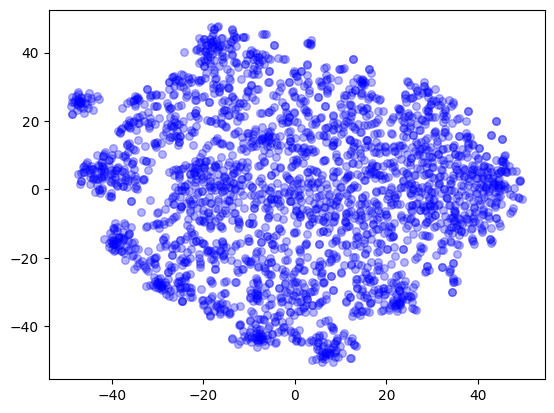

In [9]:
plt.scatter(tt[:,0], tt[:,1], s=30, c='b', alpha=0.3)